<a href="https://colab.research.google.com/github/paralkardhananjay/Bike-Sharing-Demand-Prediction-D-Paralkar/blob/main/Bike_Sharing_and_Demand_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** -Dhananjay Paralkar


# **Project Summary -**

**Rental bikes are being introduced in urban cities to improve mobility convenience. Ensuring timely availability of bikes is crucial to minimize waiting time and maintain a stable supply. The key challenge lies in accurately predicting the required bike count for each hour to meet demand. This prediction enables effective management and optimization of rental bike services.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rental bikes are now available in many cities to improve convenience and mobility. It is important to ensure that rental bikes are always accessible to the public when they need them, reducing waiting times. One of the main challenges is predicting how many bikes will be needed at each hour to maintain a consistent supply. This prediction helps ensure that the city has enough rental bikes available at all times to meet the demand.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [60]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#Loading the dataset
bike_sharing = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='unicode_escape')

In [62]:
#Dataset
bike_sharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [63]:
#Print first 5 entry
bike_sharing.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [64]:
bike_sharing.shape

(8760, 14)

We have 8,760 observations and 14 columns in our dataset.

In [65]:
#List of columns of the dataframe
bike_sharing.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [66]:
#Statistical description of the dataframe
bike_sharing.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [67]:
#A concise summary of the dataframe
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# EDA Chart Graph

In [68]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

In [69]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bike_sharing)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


Q. Find out in which season customer having highest number of rental bike?

perform further checks for the values that categorical columns can take.

In [70]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_sharing.groupby(col)['Rented Bike Count'].sum().reset_index()

In [71]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


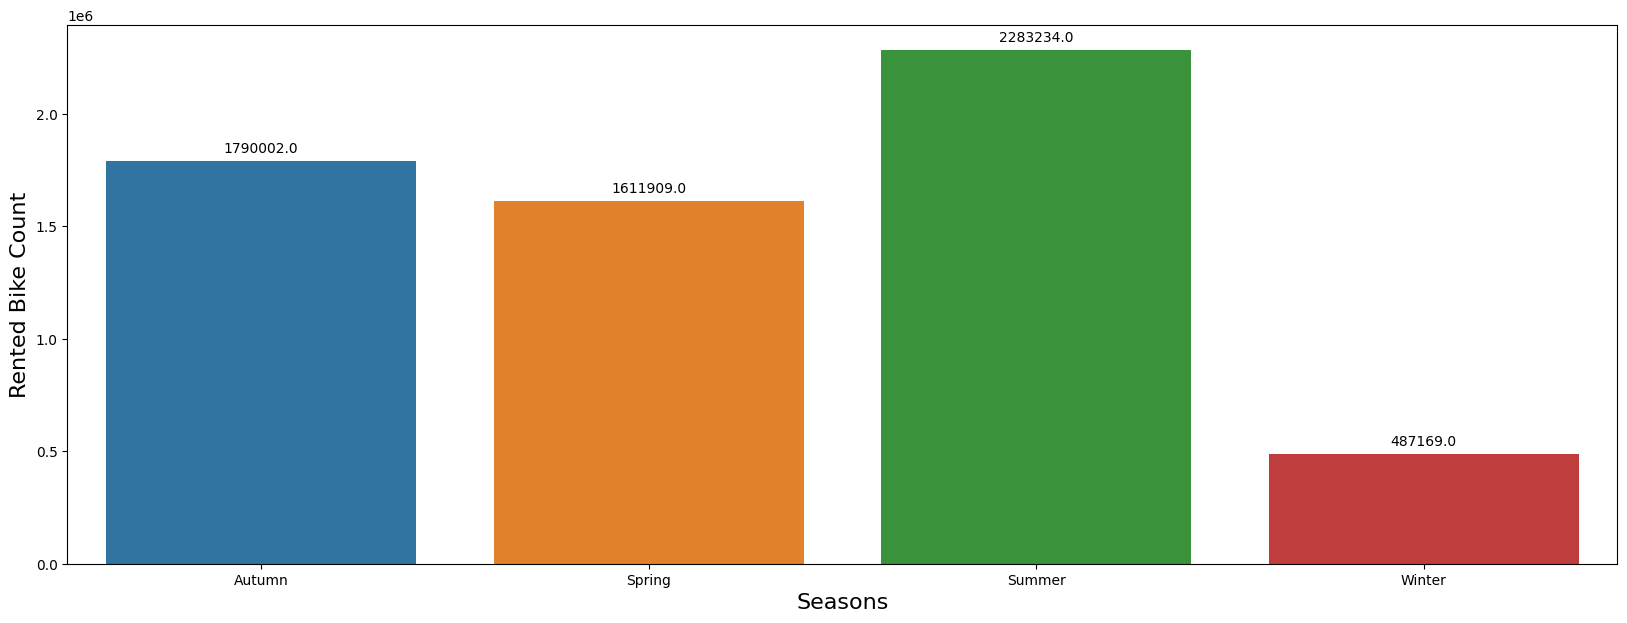

In [72]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(20,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=16)
plt.ylabel("Rented Bike Count", size=16)
plt.show()

Q.Find out the percentage of bike rented in each season?

In [73]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.06,0.06,0.06,0.06)

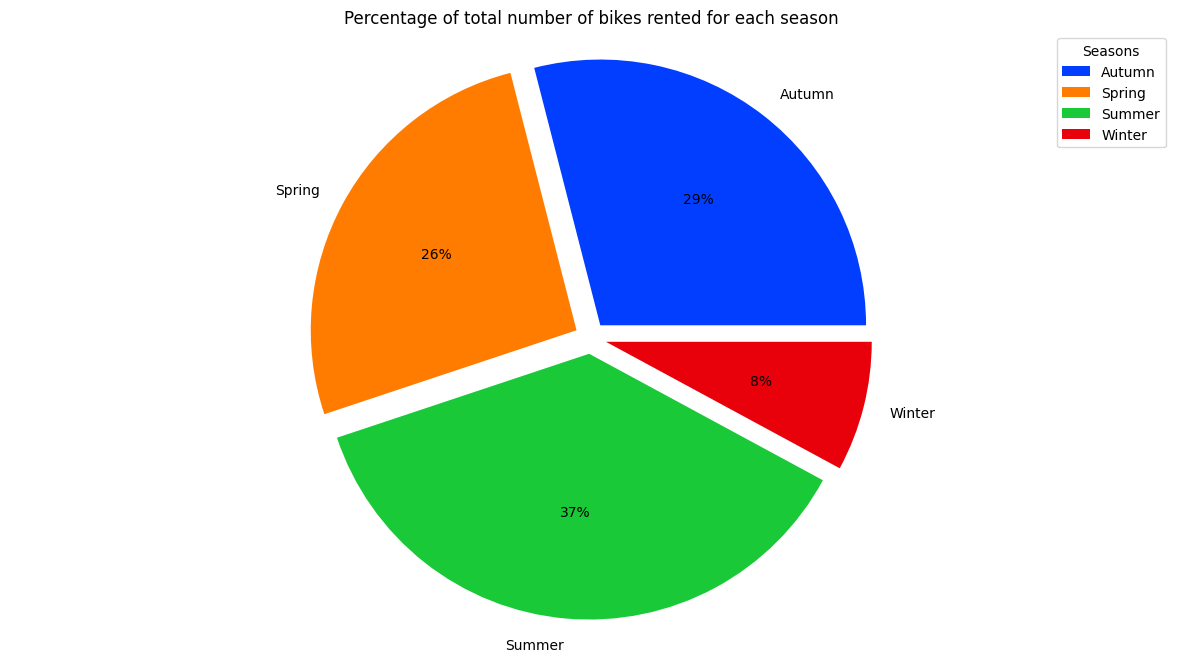

In [74]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(15,8))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.legend(title="Seasons", loc="best")
plt.show()

**Summer is the season with the highest percentage of rented bikes, accounting for 37% of the total. This can be attributed to the vacation atmosphere during summer and the larger influx of tourists. On the other hand, winter experiences the lowest bike rental rate, with only 8% of the total bikes being rented.**

Percentage of rented bike for diffrenet humidity

In [75]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages.
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


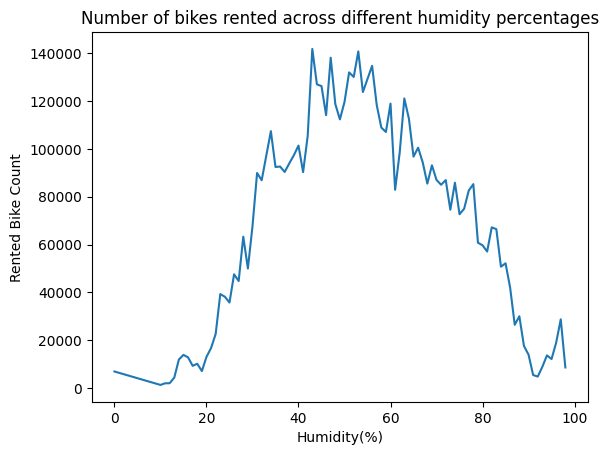

In [76]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

<b>As we can see that the majority of the bikes are rented for a humidity
percentage range of 30 to 70.</b>

Rented bike in diffrent temperature

In [77]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_df_analysis('Temperature(°C)')
temp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


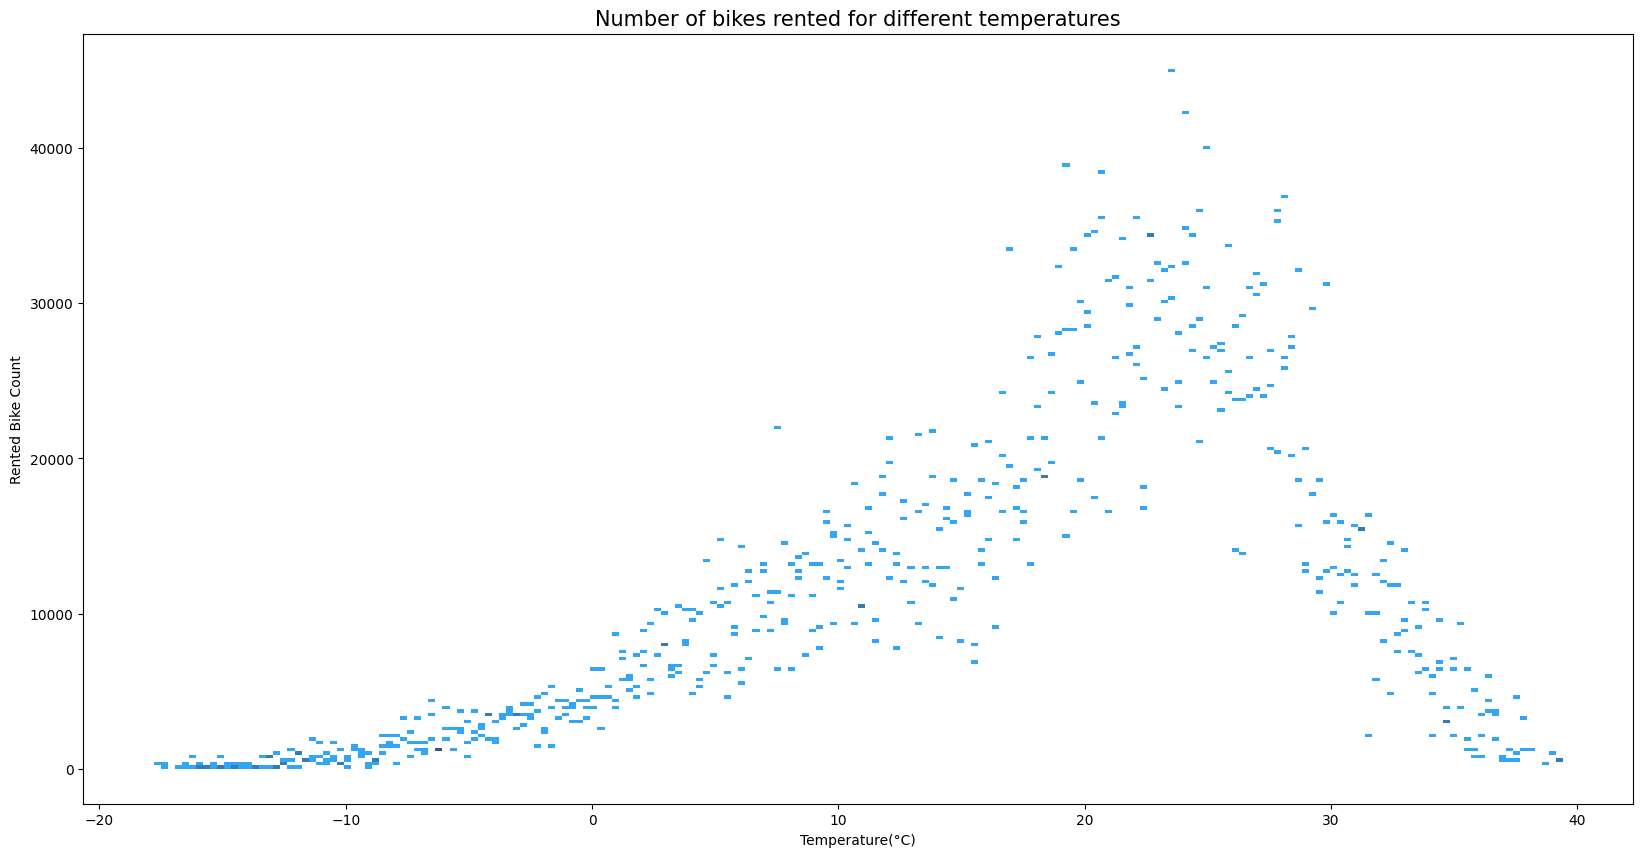

In [78]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(20,10))
sns.histplot(data=temp_bike,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

**As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.**

In [79]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall(mm)')
rainfall_bike.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


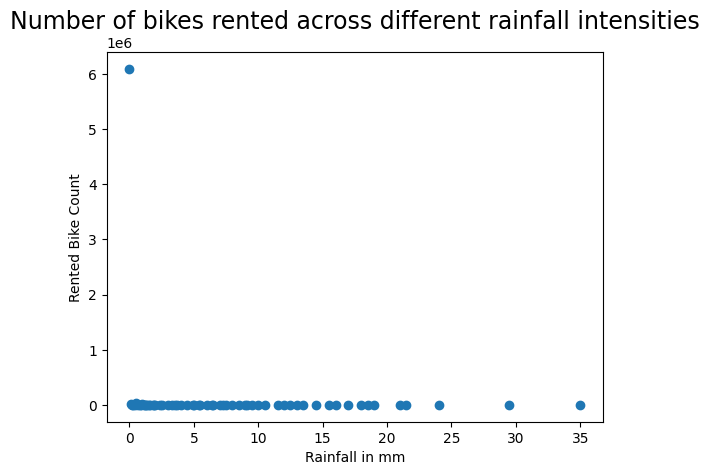

In [80]:
#Creating a visualisation for different rainfall intensities
plt.scatter(data=rainfall_bike,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=17)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

**The data shows a clear trend where the majority of bikes are rented when there is no snowfall or rainfall. It suggests that customers prefer to rent bikes when the weather conditions are favorable and do not involve precipitation.**

Rent bike on which day

In [81]:
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


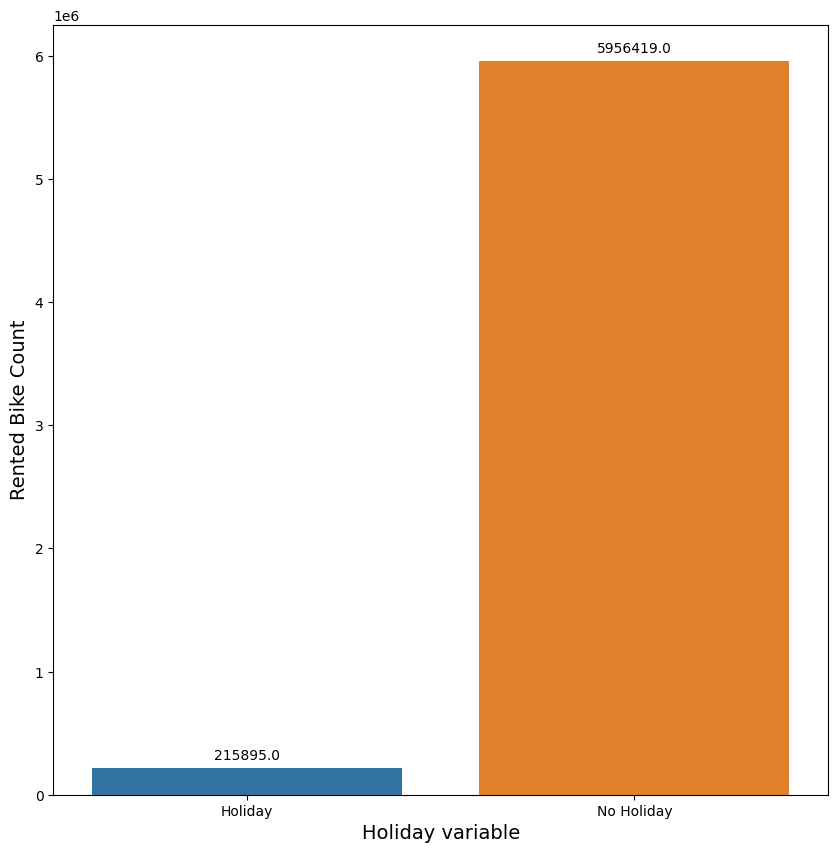

In [82]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(10,10))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**Majority of rented bikes are on non-holiday days. This indicates that bike rentals are not heavily influenced by holidays or special occasions**

Hightest number of bike rent in which hour of day

In [83]:
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


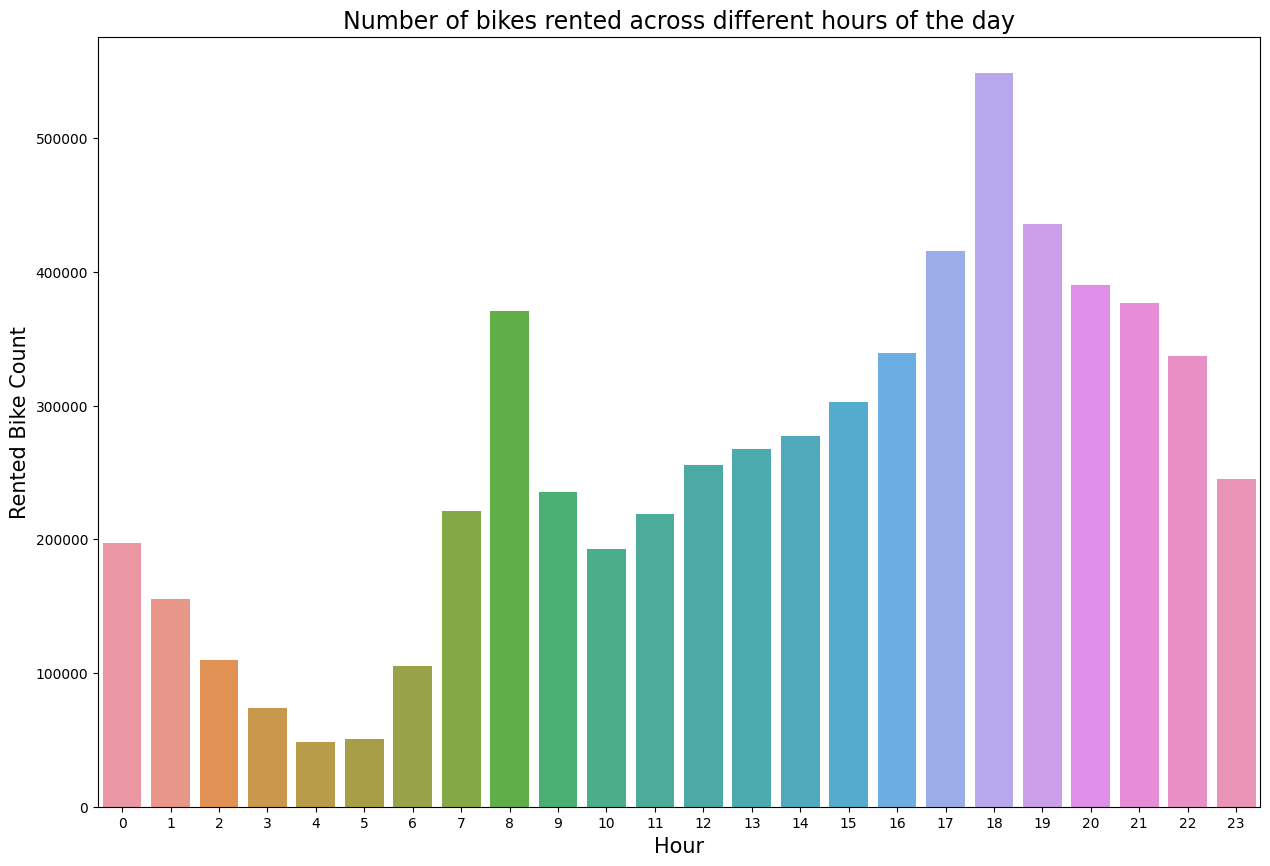

In [84]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(15,10))
sns.barplot(data=hour_df,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=17)
plt.xlabel('Hour',size=15)
plt.ylabel('Rented Bike Count',size=15)
plt.show()

Bar plot clearly depicts the rental patterns throughout the day, indicating that the peak number of bike rentals occurs at the 18th hour, corresponding to 6 PM. On the other hand, the lowest number of bike rentals is observed at the 4th hour, which represents 4 AM

# Clean Up

### <b>Handling null values:</b>

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

In [85]:
#Checking for null values
bike_sharing.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###<b>Handling duplicate values:</b>


In [86]:
#Checking for duplicate values
bike_sharing.duplicated().sum()

0

###<b>Removing outliers:</b>

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [87]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_sharing.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Dew point temperature(°C)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Rainfall(mm)',
 'Visibility (10m)',
 'Snowfall (cm)',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)']

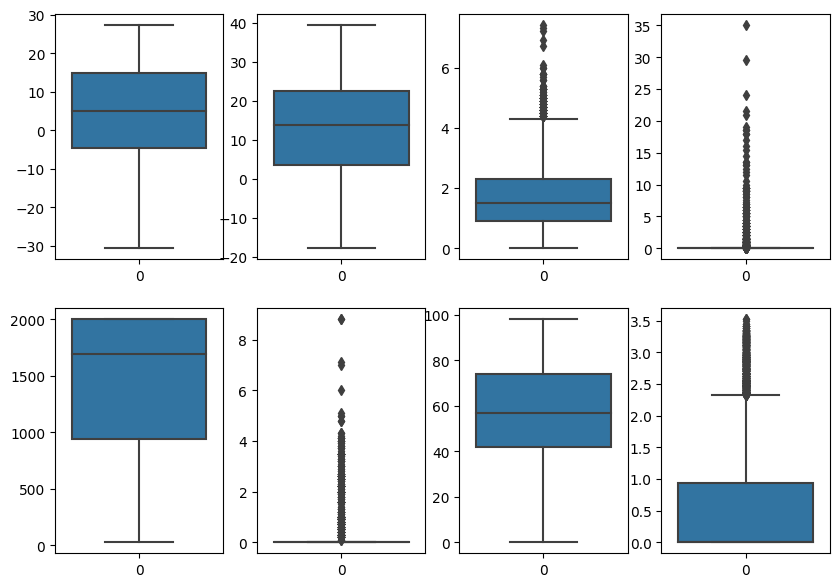

In [88]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(bike_sharing[item])

visual representation, it is evident that the columns exhibiting outliers are Rainfall, Snowfall, Windspeed, and Solar Radiation. These particular columns display data points that deviate significantly from the majority of the data.

In [89]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [90]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_sharing[outlier_cols].quantile(0.25)
Q3 = bike_sharing[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [91]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [92]:
#Detecting and removing the outliers
bike_sharing[outlier_cols] = bike_sharing[outlier_cols][~((bike_sharing[outlier_cols] < l_fence) | (bike_sharing[outlier_cols] > u_fence))]

In [93]:
#Checking the number of outliers deleted
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

After removing the outliers, it is observed that some null values have been created in the Rainfall, Snowfall, Windspeed, and Solar Radiation columns. To handle these null values, we have two options: either delete the observations containing null values or impute them with meaningful values.

In [94]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_sharing[col].fillna(bike_sharing[col].median(),inplace=True)

In [95]:
#Calling the imputing function
impute_null(outlier_cols)

In [96]:
#Checking if the imputation is successful
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

imputation is successful and therefore we have handled the outliers successfully

## <b>4.Feature Engineering:</b>

ML models is working with numerical values and therefore important categorical columns have to encoded into numerical variables. This process is known as Feature Encoding

Here we have some columns that require encoding and they are Seasons, Holiday and Functioning Day.

In [97]:
#Encoding for Seasons column
bike_sharing['Winter'] = np.where(bike_sharing['Seasons']=='Winter', 1, 0)
bike_sharing['Spring'] = np.where(bike_sharing['Seasons']=='Spring', 1, 0)
bike_sharing['Summer'] = np.where(bike_sharing['Seasons']=='Summer', 1, 0)
bike_sharing['Autumn'] = np.where(bike_sharing['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_sharing.drop(columns=['Seasons'],axis=1,inplace=True)

In [98]:
#Encoding for Holiday column
bike_sharing['Holiday'] = np.where(bike_sharing['Holiday']=='Holiday',1,0)

In [99]:
#Encoding for Functioning day
bike_sharing['Functioning Day'] = np.where(bike_sharing['Functioning Day']=='Yes',1,0)

In [100]:
#Look of the dataframe after encoding all three columns
bike_sharing.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


**Correlation **

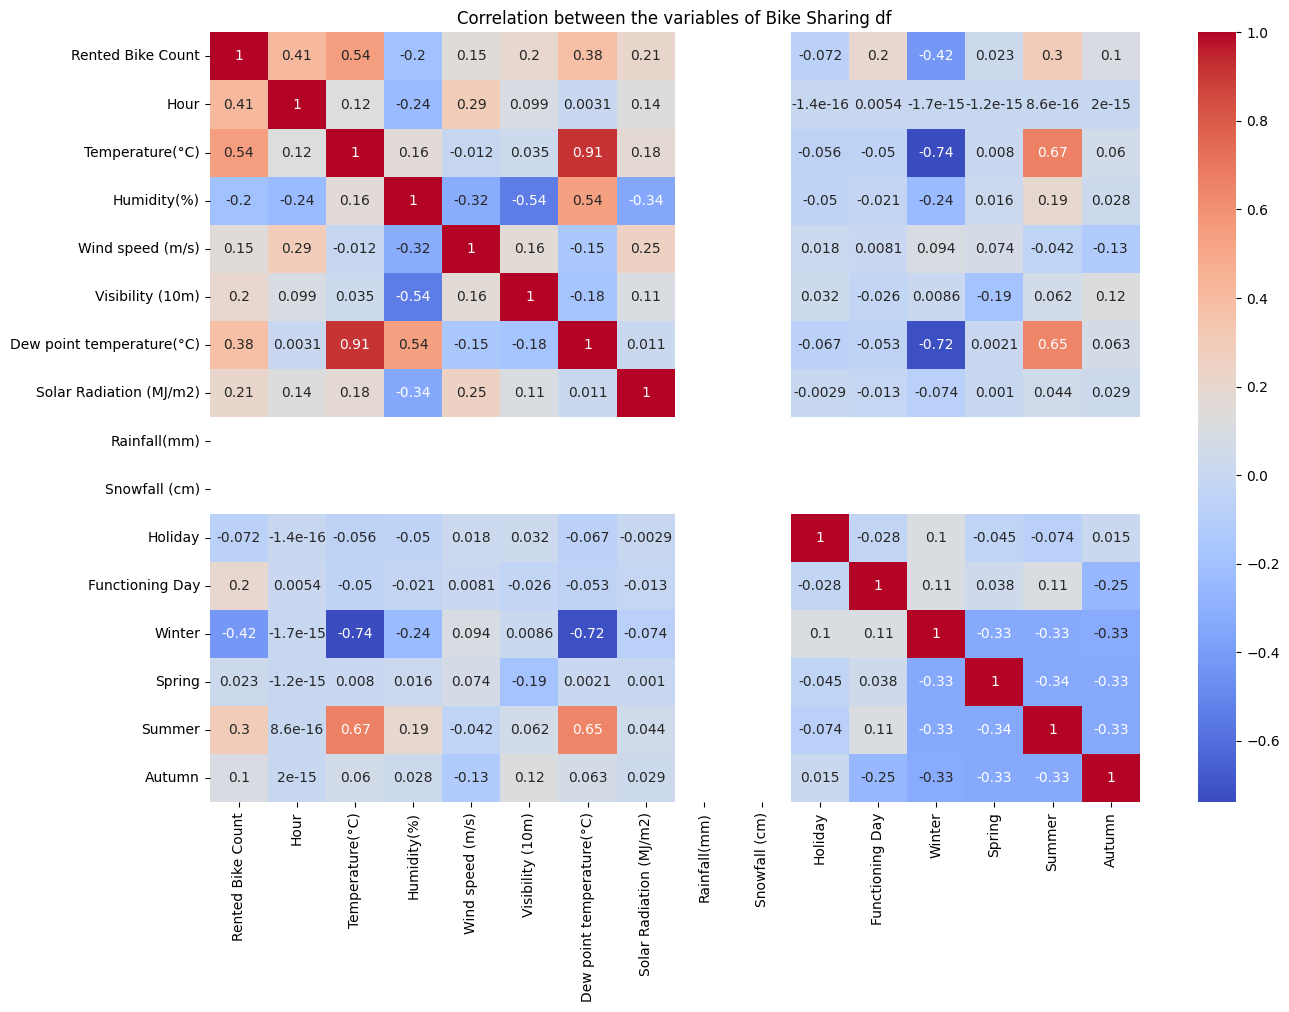

In [101]:
#Plotting correlation matrix using sns.heatmap
corr_matrix = bike_sharing.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

Due to the high correlation between the Dew Point Temperature column and the Temperature column, it is possible to remove the Dew Point Temperature column without significantly impacting our model building process. Dropping this column is expected to have minimal consequences on our modeling efforts, as the information captured by the Dew Point Temperature can be adequately represented by the Temperature column.

In [102]:
#Dropping unnecessary columns
bike_sharing.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [103]:
bike_sharing.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn'],
      dtype='object')

### <b>Multicollinearity:</b>
Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.


In [104]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing.columns)-{'Rented Bike Count'})

In [105]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [106]:
#Calculating the VIF for independent columns
calc_vif(bike_sharing[idv_cols])

,Columns,VIF
0,Autumn,23.650728
1,Winter,20.853971
2,Temperature(°C),4.443786
3,Hour,1.180808
4,Wind speed (m/s),1.234386
5,Visibility (10m),1.629212
6,Rainfall(mm),NaN
7,Holiday,1.022255
8,Functioning Day,1.079354
9,Summer,31.340811


After analyzing the Variance Inflation Factor (VIF) for the encoded Seasons column, it appears to exhibit high multicollinearity. Consequently, we can choose to eliminate one of the encoded columns

In [107]:
#Dropping the Unnecessary columns
bike_sharing.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [108]:
#Creating a list of remaining independent columns
idv_cols = list(set(bike_sharing.columns)-{'Rented Bike Count'})

In [109]:
#Calculating VIF for remaining independent columns
calc_vif(bike_sharing[idv_cols])

,Columns,VIF
0,Autumn,4.448885
1,Temperature(°C),9.607644
2,Hour,4.226978
3,Wind speed (m/s),4.834994
4,Visibility (10m),7.345935
5,Holiday,1.071381
6,Functioning Day,18.833311
7,Summer,9.199786
8,Humidity(%),10.462240
9,Spring,3.976104


In [110]:
#Dropping the Functioning Day column
bike_sharing.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [111]:
#Creating a list with remaining independent columns
idv_cols = list(set(bike_sharing.columns)-{'Rented Bike Count'})

In [112]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_sharing[idv_cols])

,Columns,VIF
0,Autumn,4.437701
1,Temperature(°C),9.481974
2,Hour,4.025525
3,Wind speed (m/s),4.707847
4,Visibility (10m),5.216380
5,Holiday,1.070809
6,Summer,9.167621
7,Humidity(%),5.401113
8,Spring,3.927898
9,Solar Radiation (MJ/m2),1.598384


 we don't have any variable with VIF>10 we can move ahead.

In [113]:
#Creating the dataset for independent and dependent variables
X = bike_sharing.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_sharing['Rented Bike Count']

In [114]:
#First look of the independent variable dataset
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0


In [115]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

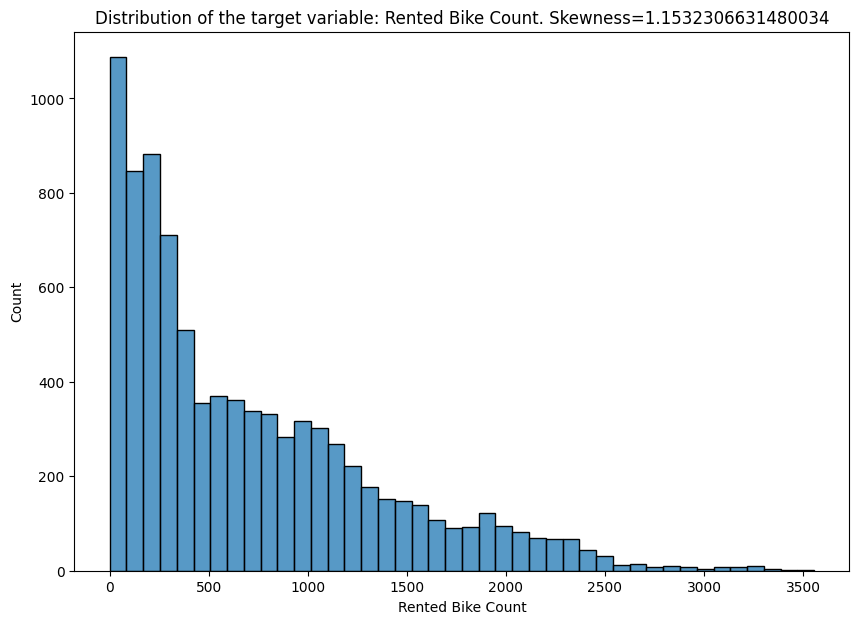

In [117]:
#Checking for the distribution of the Target variable
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(bike_sharing['Rented Bike Count'])))
sns.histplot(data=bike_sharing,x='Rented Bike Count')
plt.show()

In [118]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [119]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

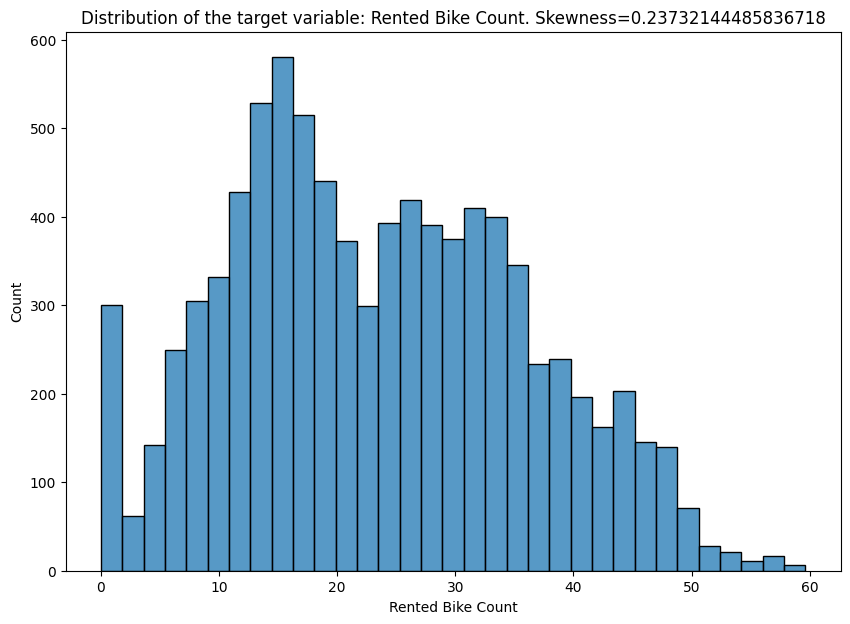

In [120]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(vis_Y['Rented Bike Count'])))
sns.histplot(data=vis_Y,x='Rented Bike Count')
plt.show()

### <b>Data Split:</b>

In [121]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [122]:
#Shape of the train set of the independent values
X_train.shape

(6570, 10)

In [123]:
#Shape of the test set of the independent values
X_test.shape

(2190, 10)

Feature scaling is a technique used to standardize or normalize the independent features in a dataset to a fixed range. This process ensures that all the features are on a similar scale, which can be beneficial for certain machine learning algorithms

In [124]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [125]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.5807482 ,
        -0.57582707,  1.72819284],
       [ 0.36544652,  0.93615918, -0.54181953, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.5807482 ,
        -0.57582707, -0.57863913],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.5807482 ,
         1.73663249, -0.57863913],
       [-1.66021162, -0.37401835,  0.04777967, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.23358573, -0.47415931,  1.22697808, ...,  1.72191666,
        -0.57582707, -0.57863913]])

## <b>6.Machine Learning Model:</b>
Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.


### <b>Linear regression:</b>
Linear regression is a supervised learning regression technique that aims to predict the value of a dependent variable (y) based on a given independent variable (x). It establishes a linear relationship between the input variable (x) and the output variable (y). By fitting a straight line to the data points, linear regression seeks to find the best-fit line that minimizes the overall difference between the predicted values and the actual values.

In [127]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,Y_train)

In [128]:
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.4827923516054774

In [129]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.4929119 ,  4.43820835, -3.25571533, -0.00611553,  0.20455542,
        0.1619329 , -0.7878579 ,  2.44910325,  3.1553882 ,  2.72281164])

In [130]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [131]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

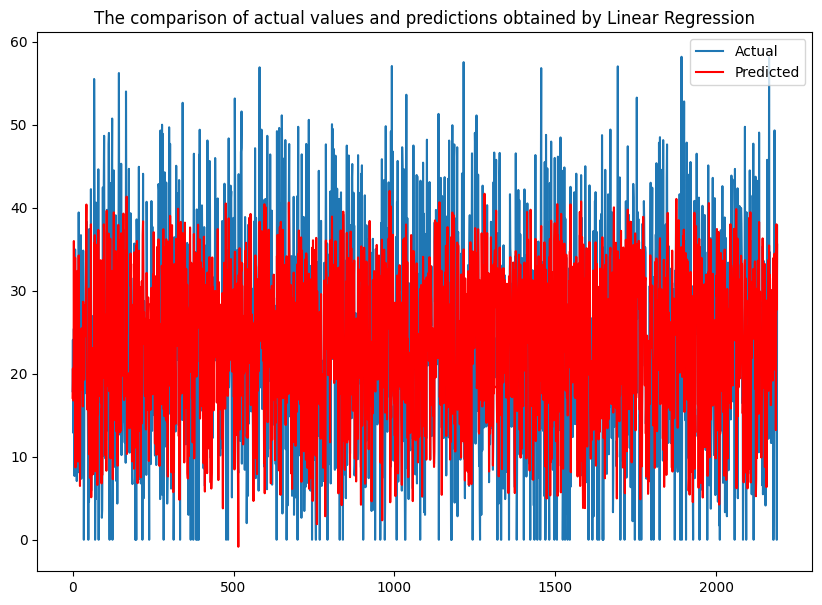

In [132]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [133]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [134]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.39593253656746
RMSE : 9.294941233626357
R2 : 0.4530740036673806
Adjusted R2 : 0.4505640174519946


### <b>Ridge Regression:</b>
Ridge regression is a regularization technique used for estimating the coefficients of regression models when the independent variables exhibit high correlation. It is an extension of linear regression that incorporates the L2 regularization method.


In [135]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [136]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 35}

Using {'alpha': 35} as the value for aplha gives us a negative mean squared error of: -80.01666506008739


In [137]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=35).fit(X_train,Y_train)

In [138]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

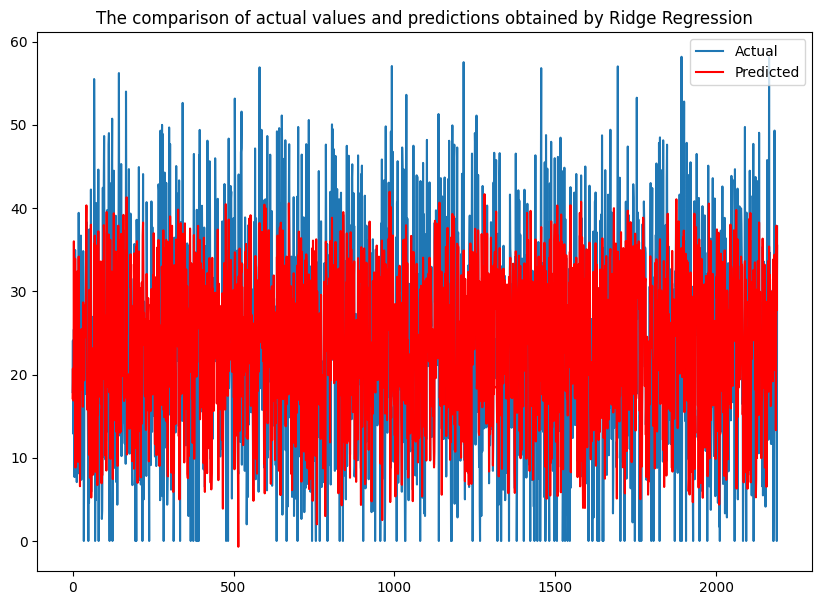

In [139]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [140]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 86.39135788258078
RMSE : 9.294695147372009
R2 : 0.4531029633315232
Adjusted R2 : 0.4505931100195981


 we can see there is only  slight difference between the results achieved through Linear regression and Ridge regression(0.03)

### <b>Random Forest Regression:</b>
Random Forest Regression is a powerful ensemble learning method that combines multiple decision trees to make predictions. It constructs a collection of decision trees by randomly selecting subsets of the training data and features. Each decision tree independently predicts the target variable, and the final prediction is obtained by averaging the predictions of all the trees.

In [141]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [142]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7124126908964326


In [143]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [144]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

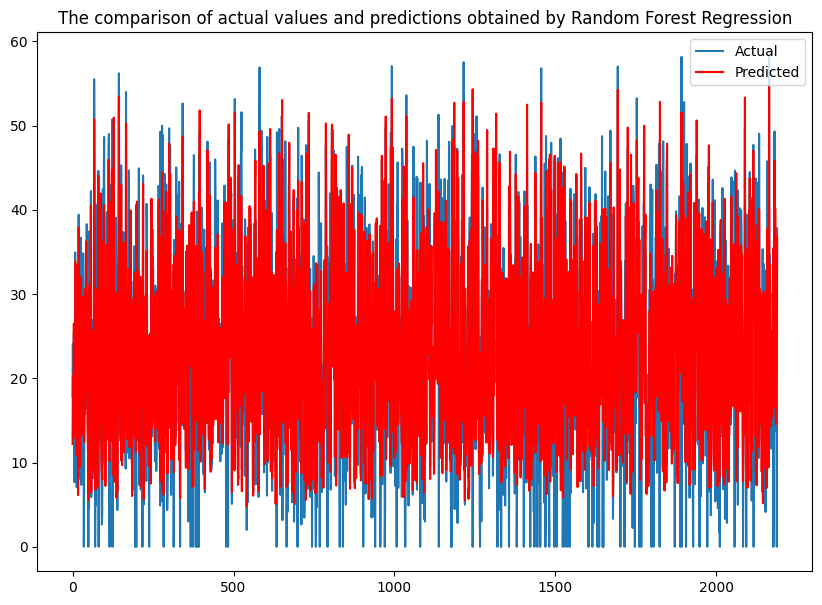

In [145]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [146]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 53.26847246772461
RMSE : 7.298525362545821
R2 : 0.6627860650130036
Adjusted R2 : 0.6612385022090248


# Conclusion


* The highest number of bike rentals is observed in the Autumn/Fall and Summer seasons, while the lowest is in the Spring season.
* Clear days have the highest bike rental counts, while snowy or rainy days have the lowest.
* The top 5 important features for predicting bike rentals are Season_winter, Temperature, Hour, Season_autumn, and Humidity.
Non-functioning days have significantly lower bike rentals.
* Bike rentals are more common when the temperature ranges from -5 to 25 degrees Celsius.
* Visibility between 300 to 1700 leads to higher bike rentals.
* Based on the experiments, gradient boosting and random forest regressor with optimized hyperparameters yield the best results.

*ML Model Result*

* Random Forest Regression is the best performing model with an r2 score of 0.6645.
* Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4264.
* Actual vs Prediction visualisation is done for all the 4 models.